In [2]:
import sys
import os

path = '/Users/romanriazantsev/Dev/gits/sign-pose'
os.chdir(path)
sys.path.insert(0, os.path.abspath(path))

import numpy as np
from utils.utils import to_numpy
from utils.fh_utils import *
import pandas as pd

In [3]:
base_path = '../../Datasets/FreiHAND_pub_v1'
xyz_path = os.path.join(base_path, '%s_xyz.json' % 'training')
xyz_list = json_load(xyz_path)

xyz_array = np.array(xyz_list).reshape(32560, 21, 3)
print(xyz_array.shape)

(32560, 21, 3)


In [4]:
K_path = os.path.join(base_path, '%s_K.json' % 'training')
K_list = json_load(K_path)
K_array = np.array(K_list)
print(K_array.shape)

(32560, 3, 3)


In [5]:
def get_uv():
    uv_dict = {}
    uv_list = []

    for idx, (xyz, K) in enumerate(zip(xyz_list, K_list)):
        uv = projectPoints(xyz, K)
        uv_dict[idx] = uv
        uv_list.append(uv)
        
    uv_array = np.array(uv_list)    
    return uv_dict, uv_array

uv_dict, uv_array = get_uv()

In [6]:
def sample_to_df(narray, idx, data_type):
    df = pd.DataFrame(data=narray, columns=['x','y'])
    df['point_id'] = df.index
    df['data_type'] = data_type
    
    return df

def get_df_from_idx(uv_array, xyz_array, idx):
    unnormed_2d_sample = uv_array[idx]
    normed_2d_sample = xyz_array[idx, :, :2]
    
    print(normed_2d_sample.shape)
    
    unnormed_df = sample_to_df(unnormed_2d_sample, idx, 'unnormed')
    normed_df = sample_to_df(normed_2d_sample, idx, 'normed')
    
    result_df = pd.concat([unnormed_df, normed_df])
    
    return result_df, unnormed_df, normed_df

In [7]:
result_df, unnormed_df, normed_df = get_df_from_idx(uv_array, xyz_array, 1)

(21, 2)


In [8]:
def normalize_dataframe(df_1):
    for column in ['x', 'y']:
        df_1[column] = df_1[column] - df_1[column].mean()
        df_1[column] = df_1[column] / df_1[column].std()
        
    return df_1

In [9]:
unnormed_df_ = normalize_dataframe(unnormed_df)
normed_df_ = normalize_dataframe(normed_df)

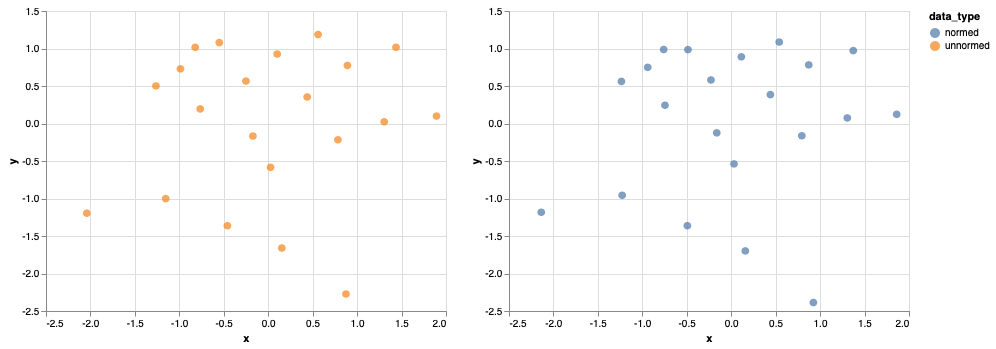

In [10]:
import altair as alt
from vega_datasets import data


chart_1 = alt.Chart(unnormed_df_).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='data_type',
).interactive()

chart_2 = alt.Chart(normed_df_).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='data_type',
).interactive()

chart_1 | chart_2

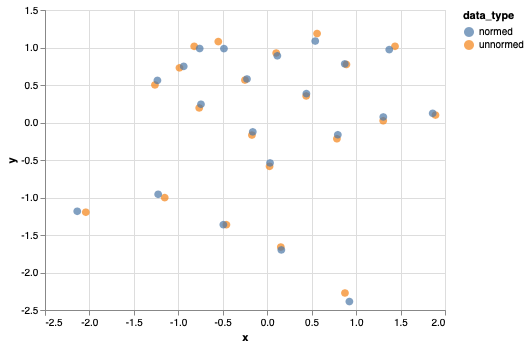

In [11]:
result_df_ = pd.concat([unnormed_df_, normed_df_])

alt.Chart(result_df_).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='data_type',
).interactive()

In [12]:
xyz_array[0,...,2]

array([0.56315116, 0.58878315, 0.61253272, 0.6374409 , 0.65775988,
       0.65138304, 0.68186752, 0.7008122 , 0.72599338, 0.64969438,
       0.67676929, 0.69442274, 0.71829936, 0.62777246, 0.65401053,
       0.67299638, 0.69724862, 0.60716644, 0.62324935, 0.6347107 ,
       0.65365011])

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

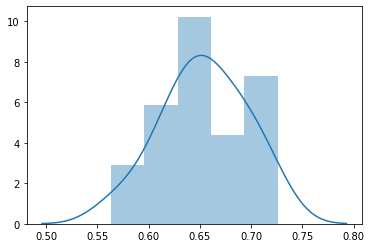

In [29]:
sns.distplot(xyz_array[0,...,2])

In [30]:
z_copy = xyz_array[0,...,2].copy()
z_copy = (z_copy - z_copy.min()) 
z_max_absolute = z_copy.max()
z_normed = z_copy / z_max_absolute

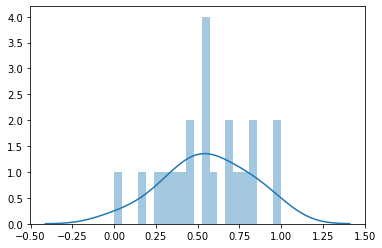

In [31]:
sns.distplot(z_normed,bins=21)

In [32]:
z_copy = xyz_array[0,...,2].copy()

In [33]:
z_max_absolute

0.16284222496641254

In [34]:
z_copy = xyz_array[0,...,2].copy()

In [38]:
z_copy = (z_copy - z_copy.min()) 

In [39]:
z_copy

array([0.        , 0.02563199, 0.04938156, 0.07428974, 0.09460873,
       0.08823188, 0.11871636, 0.13766105, 0.16284222, 0.08654322,
       0.11361813, 0.13127159, 0.1551482 , 0.0646213 , 0.09085937,
       0.10984522, 0.13409746, 0.04401528, 0.06009819, 0.07155954,
       0.09049895])

In [37]:
z_normed * z_max_absolute 

array([0.        , 0.02563199, 0.04938156, 0.07428974, 0.09460873,
       0.08823188, 0.11871636, 0.13766105, 0.16284222, 0.08654322,
       0.11361813, 0.13127159, 0.1551482 , 0.0646213 , 0.09085937,
       0.10984522, 0.13409746, 0.04401528, 0.06009819, 0.07155954,
       0.09049895])